# Workbook Objective: 
### Simulate SAT & ACT scoring distributions

#### Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from scipy.stats import shapiro

#### Import data

In [113]:
sat_dist = pd.read_csv('./data-clean/distribution_sat_2021.csv')
act_dist = pd.read_csv('./data-clean/distribution_act_2021.csv')

In [68]:
sat_dist

,sat_score_range,eng_pct,eng_max,eng_weight,math_pct,math_max,math_weight
0,780-800,99.610,100.000,0.003956,98.10,100.0,0.019495
1,760-780,99.310,99.600,0.002942,96.10,98.0,0.019495
2,740-760,98.100,99.300,0.012174,95.10,96.0,0.009235
3,720-740,96.100,98.000,0.019275,93.10,95.0,0.019495
4,700-720,94.100,96.000,0.019275,91.10,93.0,0.019495
5,680-700,91.100,94.000,0.029420,88.10,91.0,0.029756
6,660-680,87.100,91.000,0.039565,85.10,88.0,0.029756
7,640-660,83.100,87.000,0.039565,82.10,85.0,0.029756
8,620-640,78.100,83.000,0.049710,79.10,82.0,0.029756
9,600-620,73.100,78.000,0.049710,75.10,79.0,0.040016


In [115]:
sat_dist['eng_weight'].sum()

0.9999999999999977

In [114]:
act_dist

,act_score,eng_pct,math_pct,read_pct,sci_pct,score_pct,floor_pct,ceiling_pct,weight
0,36,100,100,100,100,100,99.60,100.0,0.004106
1,35,99,99,98,99,99,99.10,99.5,0.004106
2,34,96,99,96,98,99,98.10,99.0,0.009239
3,33,94,98,94,97,98,96.10,98.0,0.019505
4,32,92,97,91,96,96,95.10,96.0,0.009239
5,31,91,96,89,95,95,93.10,95.0,0.019505
6,30,89,94,86,93,93,90.10,93.0,0.029771
7,29,88,93,84,92,90,88.10,90.0,0.019505
8,28,86,91,82,90,88,85.10,88.0,0.029771
9,27,84,88,80,88,85,82.10,85.0,0.029771


In [117]:
act_dist['weight'].sum()

0.9999999999999979

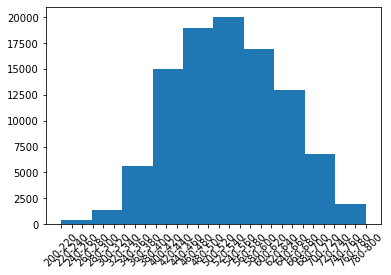

In [119]:
sat_eng = np.random.choice(a=sat_dist['sat_score_range'], size=100_000, p=sat_dist['eng_weight'], replace=True)
plt.xticks(rotation=45)
plt.hist(sorted(sat_eng), bins=10);


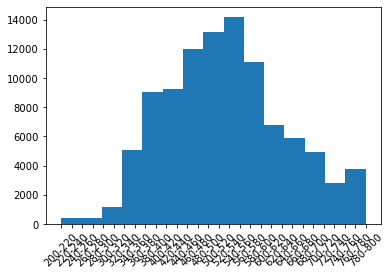

In [219]:
sat_math = np.random.choice(a=sat_dist['sat_score_range'], size=100_000, p=sat_dist['math_weight'], replace=True)
plt.xticks(rotation=45)
plt.hist(sorted(sat_math), bins=15);

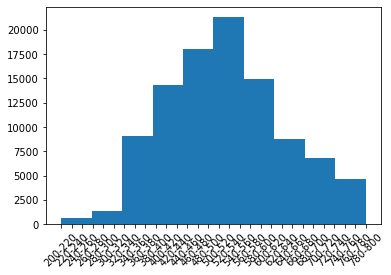

In [220]:
act_tot = np.random.choice(a=act_dist['act_score'], size=100_000, p=act_dist['weight'], replace=True)
plt.xticks(rotation=45)
plt.hist(sorted(sat_math), bins=10);

In [221]:
eng_scores = pd.DataFrame({'scores':sorted(sat_eng)})
eng_counts = eng_scores.value_counts().sort_index().values

math_scores = pd.DataFrame({'scores':sorted(sat_eng)})
math_counts = math_scores.value_counts().sort_index().values

act_scores = pd.DataFrame({'scores':sorted(act_tot)})
act_counts = act_scores.value_counts().sort_index().values

In [222]:
df_sat_scores = pd.DataFrame({
    'scores': eng_scores['scores'].unique(),
    'eng_count': eng_counts,
    'math_count': math_counts,
})

df_act_scores = pd.DataFrame({
    'scores': act_scores['scores'].unique(),
    'count': act_counts,

})


In [223]:
df_sat_scores

,scores,eng_count,math_count
0,200-220,107,107
1,220-240,152,152
2,240-260,177,177
3,260-280,144,144
4,280-300,154,154
5,300-320,1052,1052
6,320-340,908,908
7,340-360,1988,1988
8,360-380,2768,2768
9,380-400,3964,3964


In [224]:
df_act_scores

,scores,count
0,1,106
1,2,99
2,3,104
3,4,75
4,5,98
5,6,83
6,7,95
7,8,96
8,9,85
9,10,95


In [225]:
shapiro(df_act_scores['count'])    # if p-value is below 0.05 it is not normal

ShapiroResult(statistic=0.8557794094085693, pvalue=0.0002592790697235614)